In [62]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


## Step 1 - Basic Statics

In [63]:


# Number of houses in the dataset
total_houses = housing_prices.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*


In [2]:
import pandas as pd
pd.DataFrame(CLIENT_FEATURES, columns = city_data.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,11.95,0.0,18.1,0,0.659,5.609,90.0,1.385,24,680.0,20.2,332.09,12.13


**Answer: ** 
In my opinion, the three significant features are:
1. CRIM: per capita crime rate by town 
8. DIS: weighted distances to five Boston employment centres
13. LSTAT: % lower status of the population 

1.CRIM, if the crime rate of the town is too high, people will not want to live in such area, so the demand will decrease, and the price will not be high.
8.DIS, the closer to business centers the higher price, since the distance and time to work is an important feactor when people consider to buy a house.
13.LSTAT, if the percentage of the lower status of population is higher, the average economic level of this area may be lower, so the price of house will also be lower.


## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  

In [23]:
print CLIENT_FEATURES

print CLIENT_FEATURES[0][0], CLIENT_FEATURES[0][7],  CLIENT_FEATURES[0][12]

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]
11.95 1.385 12.13


**Answer: **
11.95, 1.385, 12.13

# Evaluating Model Performance

## Step 2
 `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.


In [14]:

from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)

#     X_train = None
#     y_train = None
#     X_test = None
#     y_test = None
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **
Because we want the models to work well on unknown data and prevent from overfitting. 
The training subset is used to choose the optimum parameters for a given model, and the test set is to tell how good the final choice of model is.
It gives estimate of the performance on independent data sets, and serves on check of overfitting.

Instructor advices:
As we definitely need to protect against overfitting
As we can get a good estimate of our generalization accuracy on this testing dataset
As our main goal is to accurately predict on new unseen data

## Step 3
`performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

Choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. 

In [24]:

from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
The first 4 metrics are used to measure the classification problems, between MSE and MAE, I chose MSE since it is easier to handle mathematically for variance analysis.

## Step 4 (Final Step)
`fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

In [64]:

#from sklearn.metrics import make_scorer
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    #scoring_function = make_scorer(regressor, greater_is_better=True)
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)
    

    # Make the GridSearchCV object
    #reg = GridSearchCV(regressor, parameters)
    reg = GridSearchCV(regressor, parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **
GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. 
It means that we have a set of models, then train each of the models and evaluate it using cross-validation, finally select the one that performed best.
When we are implementing algorithms like Naive Bayes, Support Vector Machines, and Decisions Trees, we can use GridSearchCV to tune the parameters and get the best performance out, otherwise, the kind of guessing and check method, will take a lot of time.
And when we want to do a simple exhaustive searching through a manually specified subset of the hyperparameter spaces of a learning algorithm, we can use GridSearchCV to perform hyperparameter optimization.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **
Cross-validation is a technique which can utilize the data for training and testing. 
For example, in k-fold cross-validation, the training data is randomly partitioned into k equal sized subsamples, Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data.The k results from the folds can then be averaged to produce a single estimation. 
The advantage of this method is that every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times, so it can help decrease the variance when using grid search.

# Checkpoint!

In [65]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [53]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
Several models' learning and testing error rates on various subsets of training data. 

Investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. 

Graphing model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


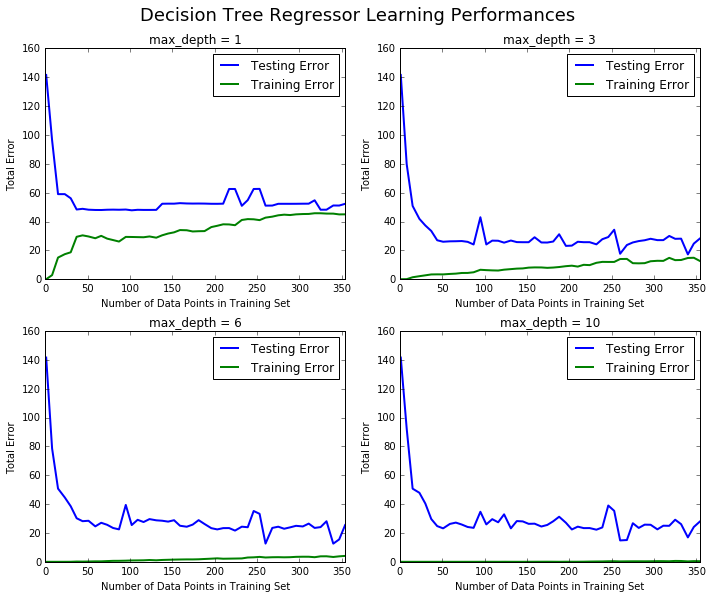

In [66]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
Max depth is 3.
As the size of training set increase, the training error increases and not over 20.
The testing error decreases sharply when data size is less than 50, and decreases slightly when training size is between 50 and 350.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
As to the max depth of 1, it suffers high bias, since the training and testing errors converge and are quite high.
As to the max depth of 10, it suffers high variance, since there is a large gap between the training and testing error.

Creating a model complexity graph. . . 


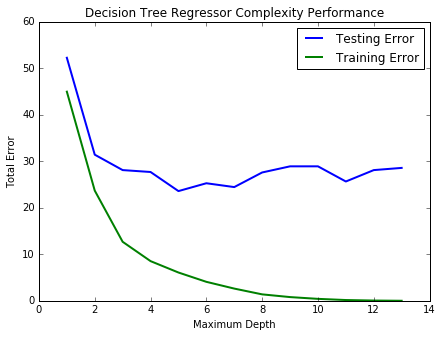

In [57]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
As the max depth increase, the testing error firstly decrease, and reaches the lowest point at max depth of 5, then increases. At the same time, the training error keeps decreasing.
The best max depth is 5 since it is the lowest point of testing error.

# Model Prediction
Make a prediction on the client's feature set using an optimized model from `fit_model`. 

When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. 

In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing the model's performance. 


## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  

In [67]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 6


**Answer: **
The optimal max_depth is 6.
While my initial intuition is 5 based on the model complexity graph.
After comparing with 6 and 5, I think 5 is better, since its gap between testing error and training error is smaller.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

In [59]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


**Answer: **
The prediction of the best selling price is 21.630.
Compared with the statics of the dataset as following, the predicted price is lower than the mean.
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2


## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **
I won't use this model to predict the price, since the training and testing error as well as their gap for max depth of 6 are still a little high, I will implement k-fold cv to decide the best parameter.